<a href="https://colab.research.google.com/github/CRPeace/Sugar-Data-Viz-Recreation/blob/main/Data_Viz_Recreation_2023_01_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Viz Recreation

## <font color='blue'>Here is my recreation of a data visualization showing UK Sugar Consumption

### Original Visualization

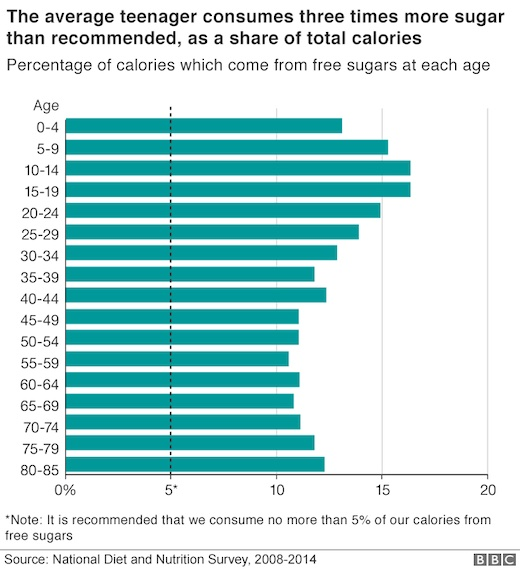

### New Data Visualization

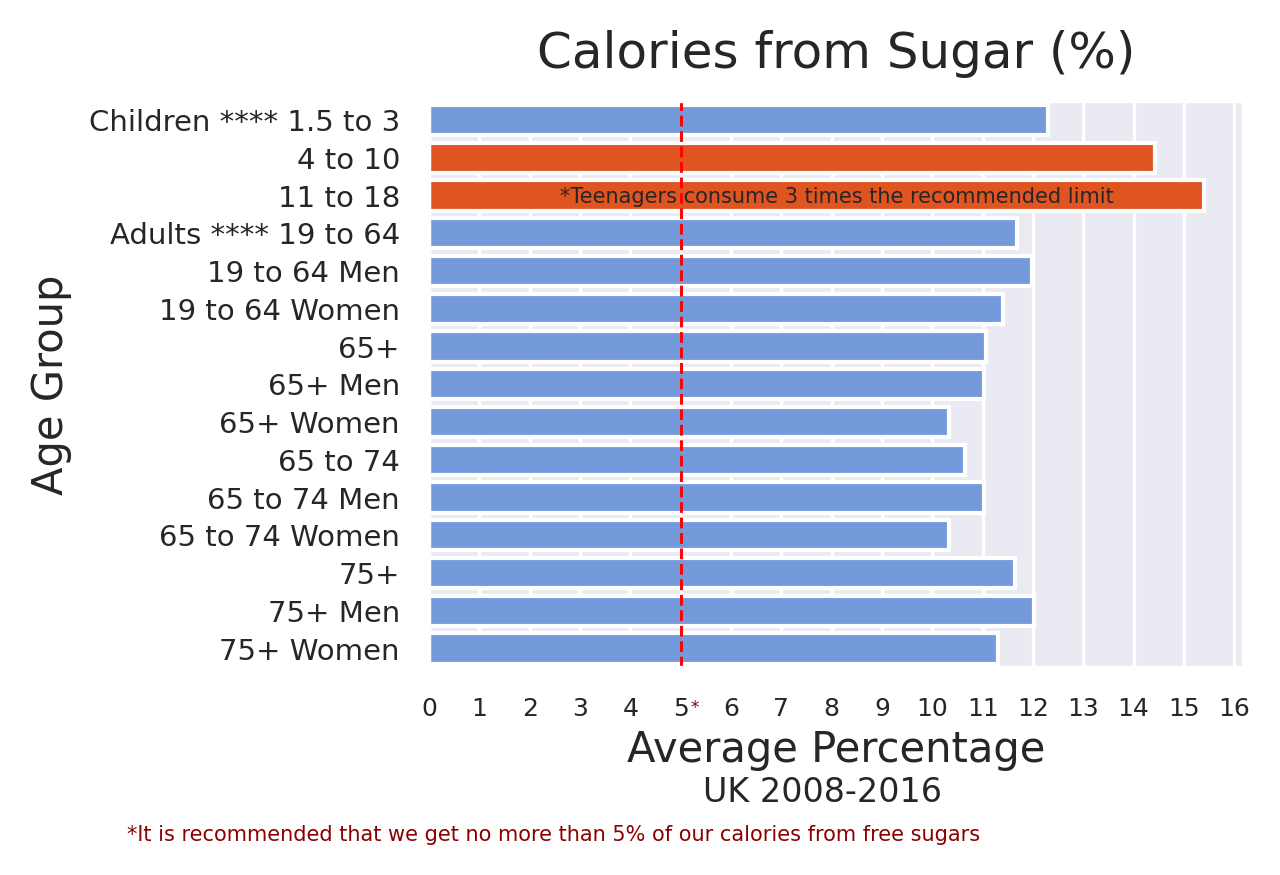

#### Info on the Data Set
This visualization and corresponding data was used on data.world as part of their Make Over Monday series.  It was originally featured in a [BBC Article](https://www.bbc.com/news/health-48499195): ***"Is it time to treat sugar like smoking?"*** June 4, 2019.  The original data source cited was the [British Nutrition Foundation](https://www.nutrition.org.uk/)

The primary metric being displayed here is: 

*Free sugars intake (% of total energy) in all age groups for all paired years of the NDNS Rolling Programme*

## Imports, Loading Data, Viewing Data

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
df = pd.read_excel('/content/Sugar Data.xlsx')

In [3]:
display(df.info(), df.describe(), df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Free sugars intake (% of total energy) in all age groups for all paired years of the NDNS Rolling Programme   15 non-null     object 
 1   (2008/09 - 2009/10)                                                                                           15 non-null     float64
 2   (2010/11 - 2011/12)                                                                                           15 non-null     float64
 3   (2012/13 - 2013/14)                                                                                           15 non-null     float64
 4   (2014/15-2015/16)                                          

None

,(2008/09 - 2009/10),(2010/11 - 2011/12),(2012/13 - 2013/14),(2014/15-2015/16)
count,15.000000,15.000000,15.000000,15.000000
mean,11.660000,12.133333,11.753333,11.540000
std,1.785577,1.535144,1.614164,1.081533
min,9.700000,11.000000,9.500000,10.400000
25%,10.100000,11.200000,11.000000,11.050000
50%,11.800000,11.400000,11.600000,11.200000
75%,12.150000,12.300000,12.300000,11.800000
max,15.900000,15.800000,15.800000,14.100000


Index(['Free sugars intake (% of total energy) in all age groups for all paired years of the NDNS Rolling Programme ',
       '(2008/09 - 2009/10)', '(2010/11 - 2011/12)', '(2012/13 - 2013/14)',
       '(2014/15-2015/16)'],
      dtype='object')

In [4]:
df.sample(7)

,Free sugars intake (% of total energy) in all age groups for all paired years of the NDNS Rolling Programme,(2008/09 - 2009/10),(2010/11 - 2011/12),(2012/13 - 2013/14),(2014/15-2015/16)
9,Adults 65-74 years,9.9,11.2,10.5,11.0
13,Men 75 years and over,11.8,12.3,11.5,12.5
7,Men 65 years and over,9.7,11.0,11.6,11.8
11,Women 65-74 years,10.1,11.3,9.5,10.4
3,Adults 19-64 years,11.8,11.7,12.1,11.1
0,Children 1.5-3 years,12.1,13.0,12.8,11.3
12,Adults 75 years and over,12.2,11.8,11.3,11.3


In [5]:
# renaming columns

df = df.rename(columns={df.columns[0]: 'age', '(2008/09 - 2009/10)': '2008-2010', '(2010/11 - 2011/12)': '2010-2012', 
                        '(2012/13 - 2013/14)': '2012-2014', '(2014/15-2015/16)':'2014-2016'})

In [6]:
# confirming changes
df

,age,2008-2010,2010-2012,2012-2014,2014-2016
0,Children 1.5-3 years,12.1,13.0,12.8,11.3
1,Children 4-10 years,14.7,15.5,14.0,13.5
2,Children 11-18 years,15.9,15.8,15.8,14.1
3,Adults 19-64 years,11.8,11.7,12.1,11.1
4,Men 19-64 years,12.0,12.3,12.5,11.1
5,Women 19-64 years,11.6,11.2,11.6,11.2
6,Adults 65 years and over,10.9,11.4,10.8,11.2
7,Men 65 years and over,9.7,11.0,11.6,11.8
8,Women 65 years and over,10.1,11.3,9.5,10.4
9,Adults 65-74 years,9.9,11.2,10.5,11.0


In [7]:
df['age'].values

array(['Children 1.5-3 years', 'Children 4-10 years',
       'Children 11-18 years', 'Adults 19-64 years', 'Men 19-64 years',
       'Women 19-64 years', 'Adults 65 years and over',
       'Men 65 years and over', 'Women 65 years and over',
       'Adults 65-74 years', 'Men 65-74 years', 'Women 65-74 years',
       'Adults 75 years and over', 'Men 75 years and over',
       'Women 75 years and over'], dtype=object)

In [8]:
# Renaming rows for Age
mapping = {'Children 1.5-3 years':'Children **** 1.5 to 3', 'Children 4-10 years':'4 to 10',
       'Children 11-18 years':'11 to 18', 'Adults 19-64 years': 'Adults **** 19 to 64', 'Men 19-64 years':'19 to 64 Men',
       'Women 19-64 years':'19 to 64 Women', 'Adults 65 years and over':'65+',
       'Men 65 years and over':'65+ Men', 'Women 65 years and over':'65+ Women',
       'Adults 65-74 years':'65 to 74', 'Men 65-74 years':'65 to 74 Men', 'Women 65-74 years':'65 to 74 Women',
       'Adults 75 years and over':'75+', 'Men 75 years and over':'75+ Men',
       'Women 75 years and over':'75+ Women'}
df['age'] = df['age'].apply(lambda x: mapping[x])

In [9]:
# Confirming changes

df['age'].values

array(['Children **** 1.5 to 3', '4 to 10', '11 to 18',
       'Adults **** 19 to 64', '19 to 64 Men', '19 to 64 Women', '65+',
       '65+ Men', '65+ Women', '65 to 74', '65 to 74 Men',
       '65 to 74 Women', '75+', '75+ Men', '75+ Women'], dtype=object)

In [10]:
# Calculating the average percentage of sugar calories from all time periods and putting it in a new column 'average'.

df['average'] = (df['2008-2010'] + df['2010-2012'] + df['2012-2014'] + df['2014-2016']) / 4

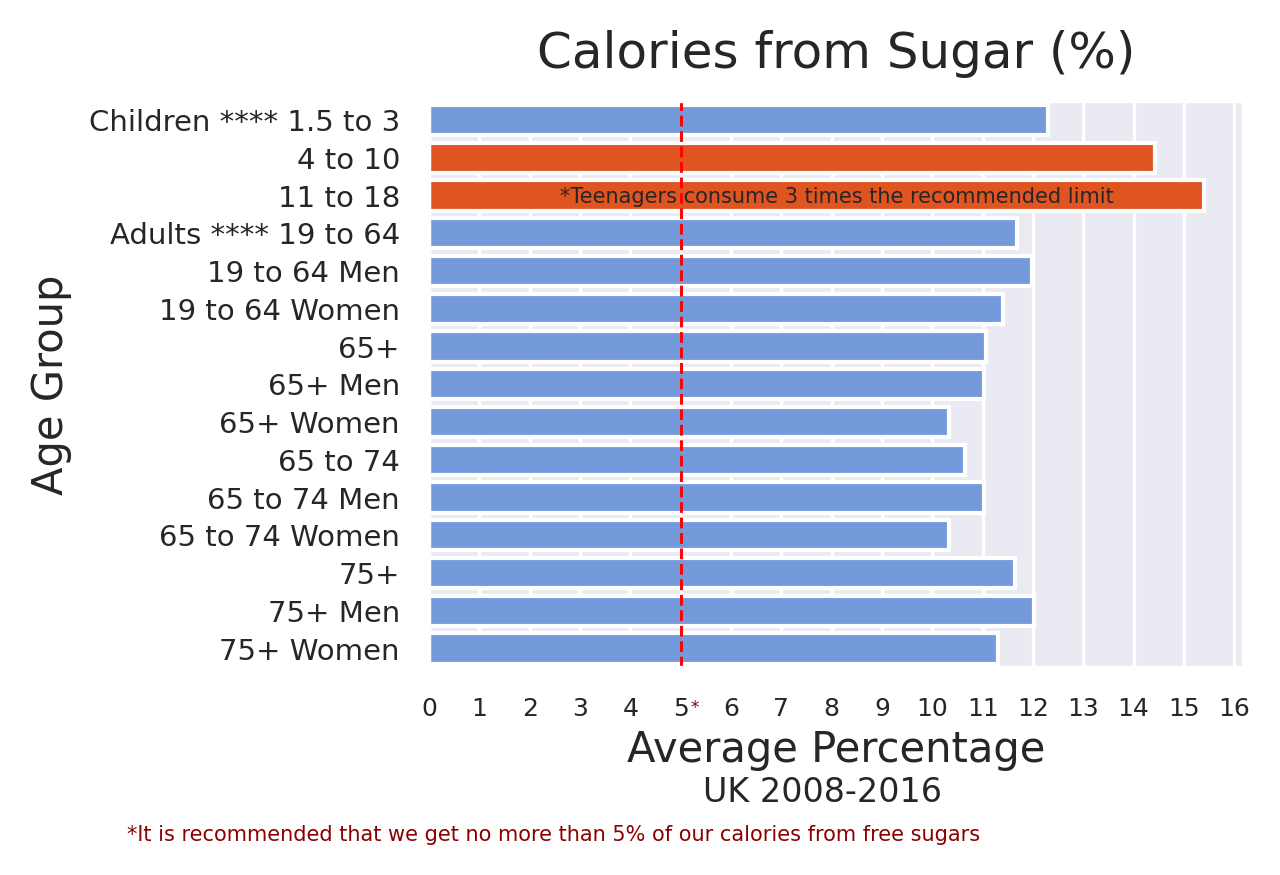

In [126]:
# Plotting the data in a horizontal barplot

# List comprehension to set individual bar colors in the 'palette' argument of sns.barplot
colorlist = ['orangered' if i in [1,2] else 'cornflowerblue' for i in range(len(df['age']))]

sns.set_style('darkgrid')
plt.figure(figsize=(3.5,2.5), dpi=300)

sns.barplot(data=df, x='average', y='age', palette=colorlist)

plt.title('Calories from Sugar (%)', pad=8)
plt.suptitle('UK 2008-2016', x=.5, y=-0.02, fontsize=8)
plt.xticks([i for i in range(0,17,1)], fontsize=6)
plt.yticks(fontsize=7)
plt.axvline(5, color='red', ls='--', linewidth=.7)
plt.ylabel('Age Group')
plt.xlabel('Average Percentage', labelpad=2)

plt.text(-6, 19.1, '*It is recommended that we get no more than 5% of our calories from free sugars', fontsize=5, color='darkred' )
plt.text(5.2, 15.7, '*', fontsize=4, color='darkred' )
plt.annotate('*Teenagers consume 3 times the recommended limit', xy=(2.6, 2.2), fontsize=5)

#plt.savefig('Sugar Viz recreation.png', bbox_inches='tight')


<u>Comments:</u> <br>
<font color='dodgerblue'> <i>
* I included all of the age ranges and genders included in the original dataset, while I see why the original viz cuts them out (a little too much information), I thought it didn't really distract from the main focus of the viz.
* I also felt like it was important to point out the country and time period.
* I felt that the main point of the visualization was to point out that kids get too much of their calories from sugar, so I made these bars red to really emphasize them.
* Choosing red agains the blue does make the viz feel a little more alarming (I mean we're talking about just 3-5 percent more calories from sugar), but it really draws attention to the salient feature of the data.
* I added a note within the graph to point out that teenagers are consuming 3x the recommended limit.  The original viz does this in the title, which may be more effective, but made the title a little wordy in my opinion.
* It may be possible to used a stack bar plot to show data from other time periods for the same age group.
* There may be a way to also emphasize that *everyone* is eating too much sugar, not just kids.  I found that trying to do this de-emphasized the main point of adolescent sugar consumption, so I dropping it.


</i></font>